In [2]:
import os
from glob import glob
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 10)

In [19]:
DATA_PATH = r'/media/joseph/Development/SFITC/DrivingStereo/train/2018-07-09-16-11-56'

left_image_paths = sorted(glob(os.path.join(DATA_PATH, 'left/*.jpg')))
right_image_paths = sorted(glob(os.path.join(DATA_PATH, 'right/*.jpg')))
bin_paths = sorted(glob(os.path.join(DATA_PATH, 'depth/*.png')))

print(f"Number of left images: {len(left_image_paths)}")
print(f"Number of right images: {len(right_image_paths)}")
print(f"Number of LiDAR point clouds: {len(bin_paths)}")

Number of left images: 2776
Number of right images: 2776
Number of LiDAR point clouds: 2776


In [4]:
index = 80

left_image = cv2.cvtColor(cv2.imread(left_image_paths[index]), cv2.COLOR_BGR2RGB)
right_image = cv2.cvtColor(cv2.imread(right_image_paths[index]), cv2.COLOR_BGR2RGB)

print(f"The shape of an image is: {left_image.shape}")

The shape of an image is: (400, 881, 3)


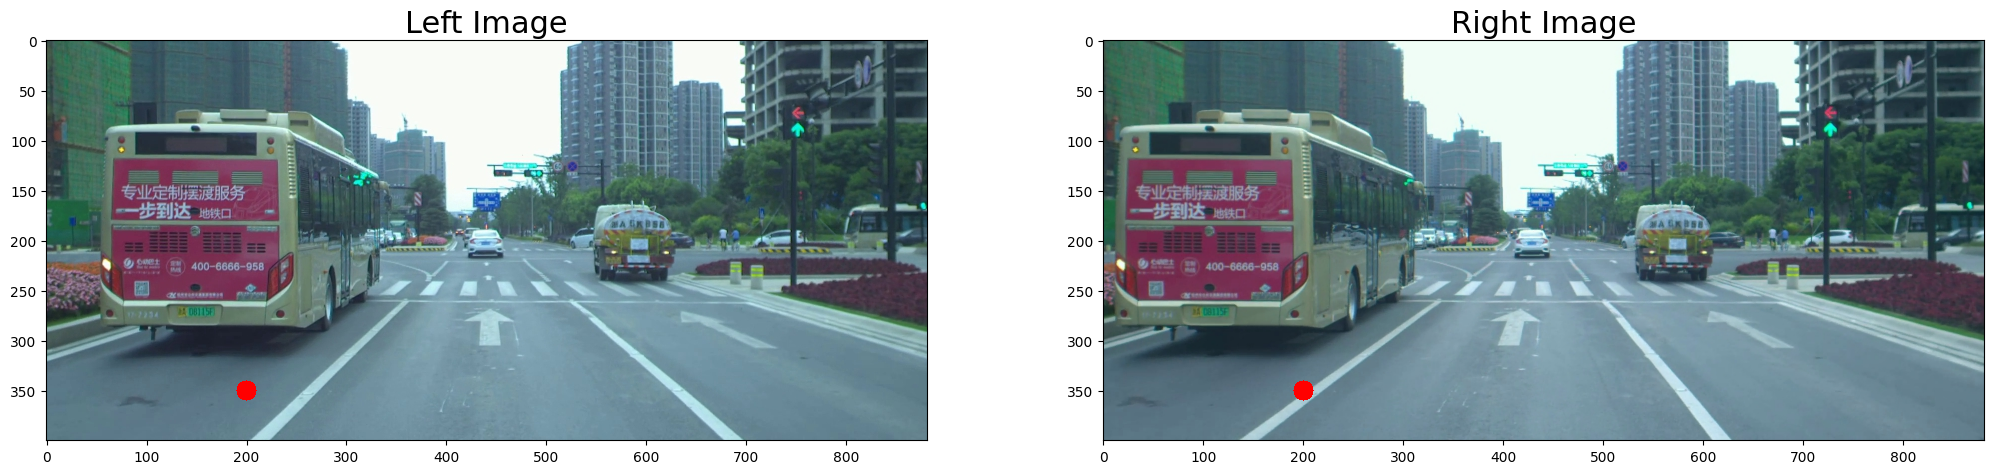

In [5]:
# draw a point of interest 
location = (200, 350)

cv2.circle(left_image, location, 10, [255, 0, 0], -1)
cv2.circle(right_image, location, 10, [255, 0, 0], -1)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 15))
ax1.imshow(left_image)
ax1.set_title('Left Image', size=22)
ax2.imshow(right_image)
ax2.set_title('Right Image', size=22);

Text(0.5, 1.0, 'Right Image')

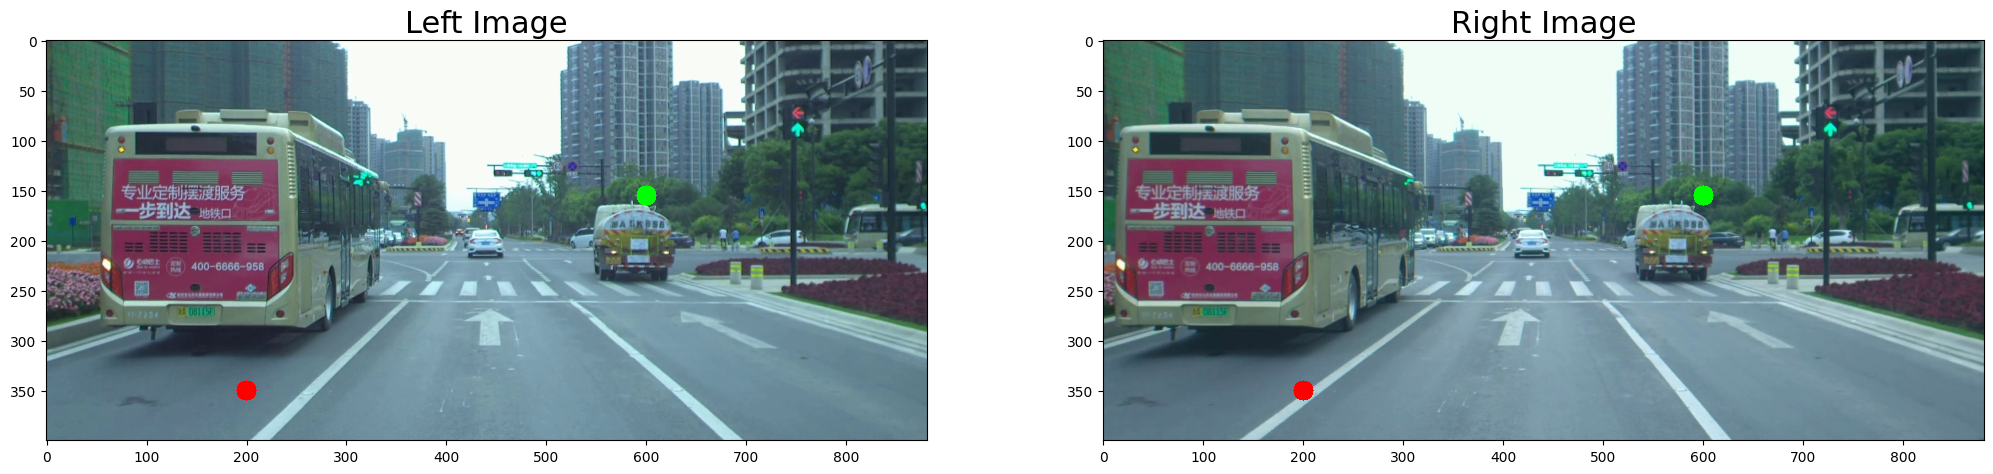

In [6]:
# draw a point of interest 
location_2 = (600, 155)

cv2.circle(left_image, location_2, 10, [0, 255, 0], -1)
cv2.circle(right_image, location_2, 10, [0, 255, 0], -1)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 15))
ax1.imshow(left_image)
ax1.set_title('Left Image', size=22)
ax2.imshow(right_image)
ax2.set_title('Right Image', size=22)

In [7]:
def compute_sgbm_disparity(left_image, right_image, num_disparities=5*16, 
                           block_size=11, window_size=5, display=False):
    """ Computes the disparity of an image pair using the SGBM algoithm.
        Inputs: 
            image_left/_right - (MxN) grayscale input images
            see opencv documentation for "StereoBM_create"
        Outputs:
            disparity (MxN) computed disparity map for the input images
        
        NOTE: image_left must be the left image (same for the right) or 
              unexpected results will occur due to 
    """
    # P1 and P2 control disparity smoothness (recommended values below)
    P1 = 8 * 3 * window_size**2
    P2 = 32 * 3 * window_size**2
    sgbm_obj = cv2.StereoSGBM_create(0, num_disparities, block_size, 
        P1, P2, mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY)
        
    # compute disparity
    disparity = sgbm_obj.compute(left_image, right_image).astype(np.float32)/16.0

    # display is desired
    if display:
      plt.figure(figsize = (40,20))
      plt.imshow(disparity, cmap='cividis')
      plt.title('Disparity Map', size=25)
      plt.show()

    return disparity

In [8]:
left_image_gray = cv2.cvtColor(left_image, cv2.COLOR_RGB2GRAY)
right_image_gray = cv2.cvtColor(right_image, cv2.COLOR_RGB2GRAY)

In [9]:
from IPython.display import Image
from ipywidgets import interact, interactive, fixed

disparity = interactive(compute_sgbm_disparity, 
                        left_image=fixed(left_image_gray), 
                        right_image=fixed(right_image_gray), 
                        num_disparities=(0,512,16), 
                        block_size=(1,19,2), 
                        window_size=(1,13,2),
                        display=fixed(True))
display(disparity)

interactive(children=(IntSlider(value=80, description='num_disparities', max=512, step=16), IntSlider(value=11…

In [10]:
# num_disparities = disparity.kwargs['num_disparities']
# block_size = disparity.kwargs['block_size']
# window_size = disparity.kwargs['window_size']
num_disparities = 48
block_size = 9
window_size = 5

In [11]:
disparity = compute_sgbm_disparity(left_image_gray, 
                                   right_image_gray, 
                                   num_disparities, 
                                   block_size, 
                                   window_size, 
                                   display=False)

In [12]:
# with open('/media/joseph/Development/SFITC/kitti/data_scene_flow_calib/training/calib_cam_to_cam/000000.txt','r') as f:
#     calib = f.readlines()

# P_left = np.array([float(x) for x in calib[25].strip().split(' ')[1:]]).reshape((3,4))
# P_right = np.array([float(x) for x in calib[33].strip().split(' ')[1:]]).reshape((3,4))

# print('left projection matrix')
# print(P_left)

# print()
# print('right projection matrix')
# print(P_right)

In [13]:
with open('/media/joseph/Development/SFITC/DrivingStereo/train/2018-07-09-16-11-56/half-image-calib.txt','r') as f:
    calib = f.readlines()

P_left = np.array([float(x) for x in calib[8].strip().split(' ')[1:]]).reshape((3,4))
P_right = np.array([float(x) for x in calib[16].strip().split(' ')[1:]]).reshape((3,4))

print('left projection matrix')
print(P_left)

print()
print('right projection matrix')
print(P_right)

left projection matrix
[[1.003556e+03 0.000000e+00 4.556890e+02 0.000000e+00]
 [0.000000e+00 1.003556e+03 1.976634e+02 0.000000e+00]
 [0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00]]

right projection matrix
[[ 1.003556e+03  0.000000e+00  4.556890e+02 -1.093101e+03]
 [ 0.000000e+00  1.003556e+03  1.976634e+02  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00]]


In [14]:
def decompose_projection_matrix(P):    
    K, R, T, _, _, _, _ = cv2.decomposeProjectionMatrix(P)
    T = T/T[3]

    return K, R, T

In [15]:
def calc_depth_map(disp_left, K_left, T_left, T_right):
    ''' Computes Depth map from Intrinsic Camera Matrix and Translations vectors.
        For KITTI, the depth is in meters.
        '''
    # Get the focal length from the K matrix
    f = K_left[0, 0]
    
    # Get the distance between the cameras from the t matrices (baseline)
    b = np.abs(T_left[0] - T_right[0])[0]
    
    # Replace all instances of 0 and -1 disparity with a small minimum value (to avoid div by 0 or negatives)
    disp_left[disp_left <= 0] = 1e-5
    
    # Calculate the depths 
    depth_map = f*b / disp_left 

    return depth_map

In [16]:
K_left, R_left, T_left = decompose_projection_matrix(P_left)
K_right, R_right, T_right = decompose_projection_matrix(P_right)

K_left

array([[1.003556e+03, 0.000000e+00, 4.556890e+02],
       [0.000000e+00, 1.003556e+03, 1.976634e+02],
       [0.000000e+00, 0.000000e+00, 1.000000e+00]])

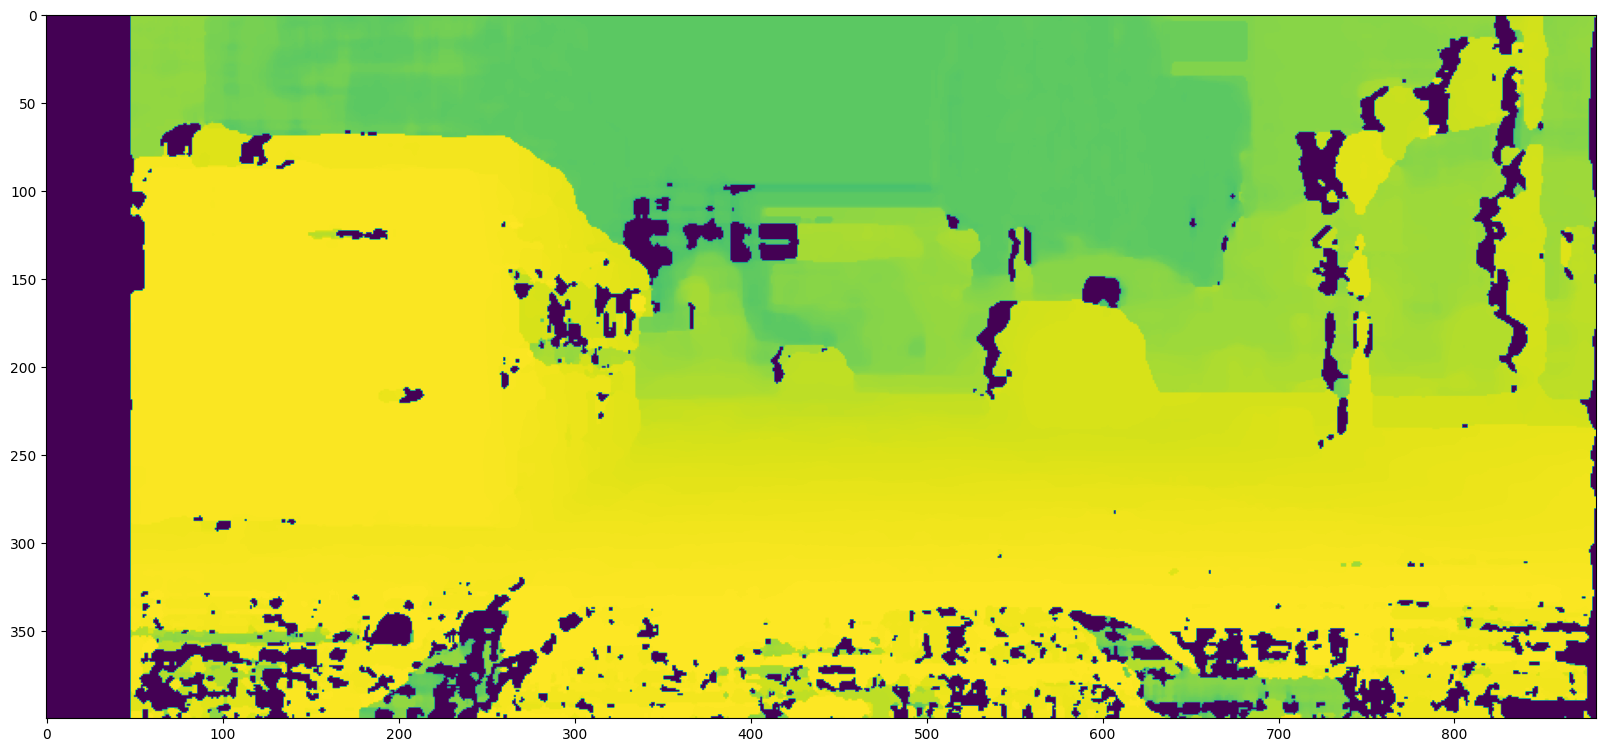

In [17]:
depth_map = calc_depth_map(disparity, K_left, T_left, T_right)
plt.imshow(np.log(depth_map), cmap='viridis_r')

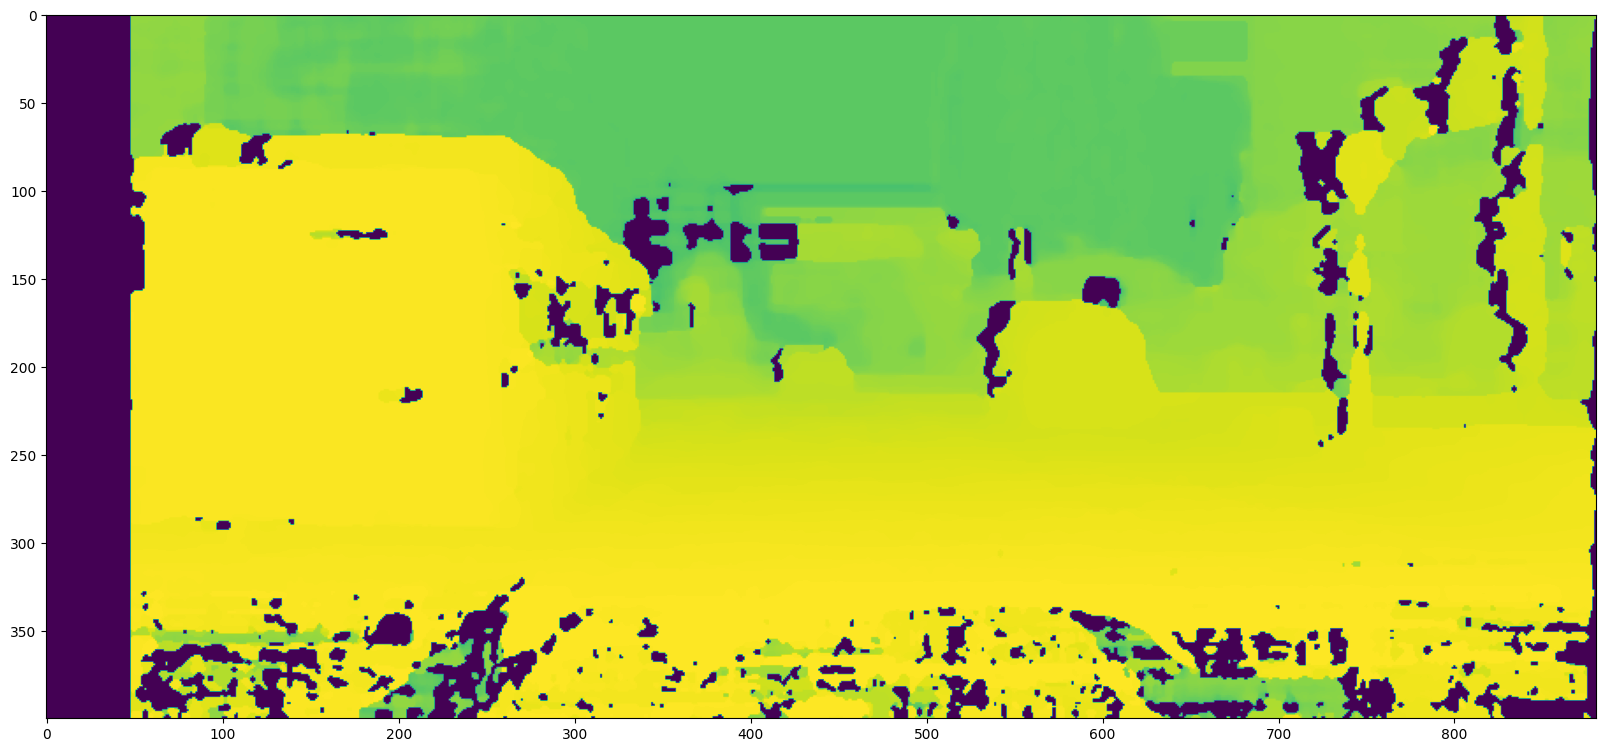

In [18]:
filtered_depth_map = cv2.medianBlur(depth_map, 3)
plt.imshow(np.log(filtered_depth_map), cmap='viridis_r')